# Ecological Analyses

In [1]:
# Import packages.
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Intialize pandas display options.
pd.set_option("display.max_columns", None)
# Intialize the matplolib styling.
plt.rcParams.update(
    {
        "figure.constrained_layout.use": True,
        "figure.facecolor": "white",
        "axes.spines.top": False,
        "axes.spines.right": False,
        "legend.frameon": False,
    }
)

## Phenology  

In [2]:
# Load the phenology data into a Pandas dataframe.
phenology_long_df = pd.read_csv("../data/phenology_data.csv")
# Create the date column.
phenology_long_df["date"] = (
    phenology_long_df["month"] + "-" + phenology_long_df["year"].apply(str)
)
# Initialize a data array.
date_array = np.array(
    [
        "JAN-2018",
        "FEB-2018",
        "MAR-2018",
        "APR-2018",
        "MAY-2018",
        "JUN-2018",
        "JUL-2018",
        "AUG-2018",
        "SEP-2018",
        "OCT-2018",
        "NOV-2018",
        "DEC-2018",
        "JAN-2019",
        "FEB-2019",
        "MAR-2019",
        "APR-2019",
        "MAY-2019",
        "JUN-2019",
        "JUL-2019",
        "AUG-2019",
        "SEP-2019",
        "OCT-2019",
        "NOV-2019",
        "DEC-2019",
        "JAN-2020",
        "FEB-2020",
        "MAR-2020",
    ]
)
# Make the date column ordered.
phenology_long_df["date"] = pd.Categorical(
    phenology_long_df["date"],
    date_array,
    ordered=True,
)
# Visually inspect the phenology data.
phenology_long_df

,species,month,year,count,type,date
0,Ficus clamydocarpa fernandesiana,JAN,2018,5,Fruit,JAN-2018
1,Ficus kamerounesis,JAN,2018,0,Fruit,JAN-2018
2,Ficus mucoso,JAN,2018,1,Fruit,JAN-2018
3,Sapium ellipticum,JAN,2018,3,Fruit,JAN-2018
4,Croton stelluifer,JAN,2018,13,Fruit,JAN-2018
...,...,...,...,...,...,...
481,D. yakuba_Obo,MAR,2020,31,Drosophila,MAR-2020
482,D. santomea_BS,MAR,2020,7,Drosophila,MAR-2020
483,F1_BS,MAR,2020,0,Drosophila,MAR-2020
484,D. yakuba_BS,MAR,2020,22,Drosophila,MAR-2020


In [3]:
phenology_long_df.species.unique()

array(['Ficus clamydocarpa fernandesiana', 'Ficus kamerounesis',
       'Ficus mucoso', 'Sapium ellipticum', 'Croton stelluifer',
       'Homalium henriquesii', 'Psydrax subcordata', 'Psydrax acutiflora',
       'Antidesma vogelianum', 'Sabicea ingrata ingrata',
       'Psidium guajava', 'D. santomea_Obo', 'F1_Obo', 'D. yakuba_Obo',
       'D. santomea_BS', 'F1_BS', 'D. yakuba_BS', 'D. yakuba_MC'],
      dtype=object)

In [3]:
# Initialize drosophila species lists.
san_list = ["D. santomea_Obo", "D. santomea_BS"]
yak_list = ["D. yakuba_Obo", "D. yakuba_BS"]
hybrid_list = ["F1_Obo", "F1_BS"]
dros_list = ["D. santomea", "D. yakuba", "F1 Hybrid"]
fruit_list = [
    "Ficus clamydocarpa fernandesiana",
    "Ficus kamerounesis",
    "Ficus mucoso",
    "Sapium ellipticum",
    "Croton stelluifer",
    "Homalium henriquesii",
    "Psydrax subcordata",
    "Psydrax acutiflora",
    "Antidesma vogelianum",
    "Sabicea ingrata ingrata",
    "Psidium guajava",
]
# Initialize a relative abundance dictionary.
abundance_dicc = {}
# Fill the drosophila species.
abundance_dicc["D. santomea"] = (
    phenology_long_df[phenology_long_df.species.isin(san_list)]
    .groupby(["date"])["count"]
    .mean()
    .values
)
abundance_dicc["D. yakuba"] = (
    phenology_long_df[phenology_long_df.species.isin(yak_list)]
    .groupby(["date"])["count"]
    .mean()
    .values
)
abundance_dicc["F1 Hybrid"] = (
    phenology_long_df[phenology_long_df.species.isin(hybrid_list)]
    .groupby(["date"])["count"]
    .mean()
    .values
)
# For every fruit species.
for fruit in fruit_list:
    # Fill the fruit species.
    abundance_dicc[fruit] = phenology_long_df[phenology_long_df.species == fruit][
        "count"
    ].values

In [4]:
# Initialize a correlation matrix.
corr_mat = np.empty((len(dros_list), len(fruit_list)))
pval_mat = np.empty((len(dros_list), len(fruit_list)))
# For every drosophila species.
for i, dros in enumerate(dros_list):
    # For every fruit species.
    for j, fruit in enumerate(fruit_list):
        # Calculate the correlation.
        corr_mat[i, j], pval_mat[i, j] = stats.spearmanr(
            abundance_dicc[dros], abundance_dicc[fruit]
        )

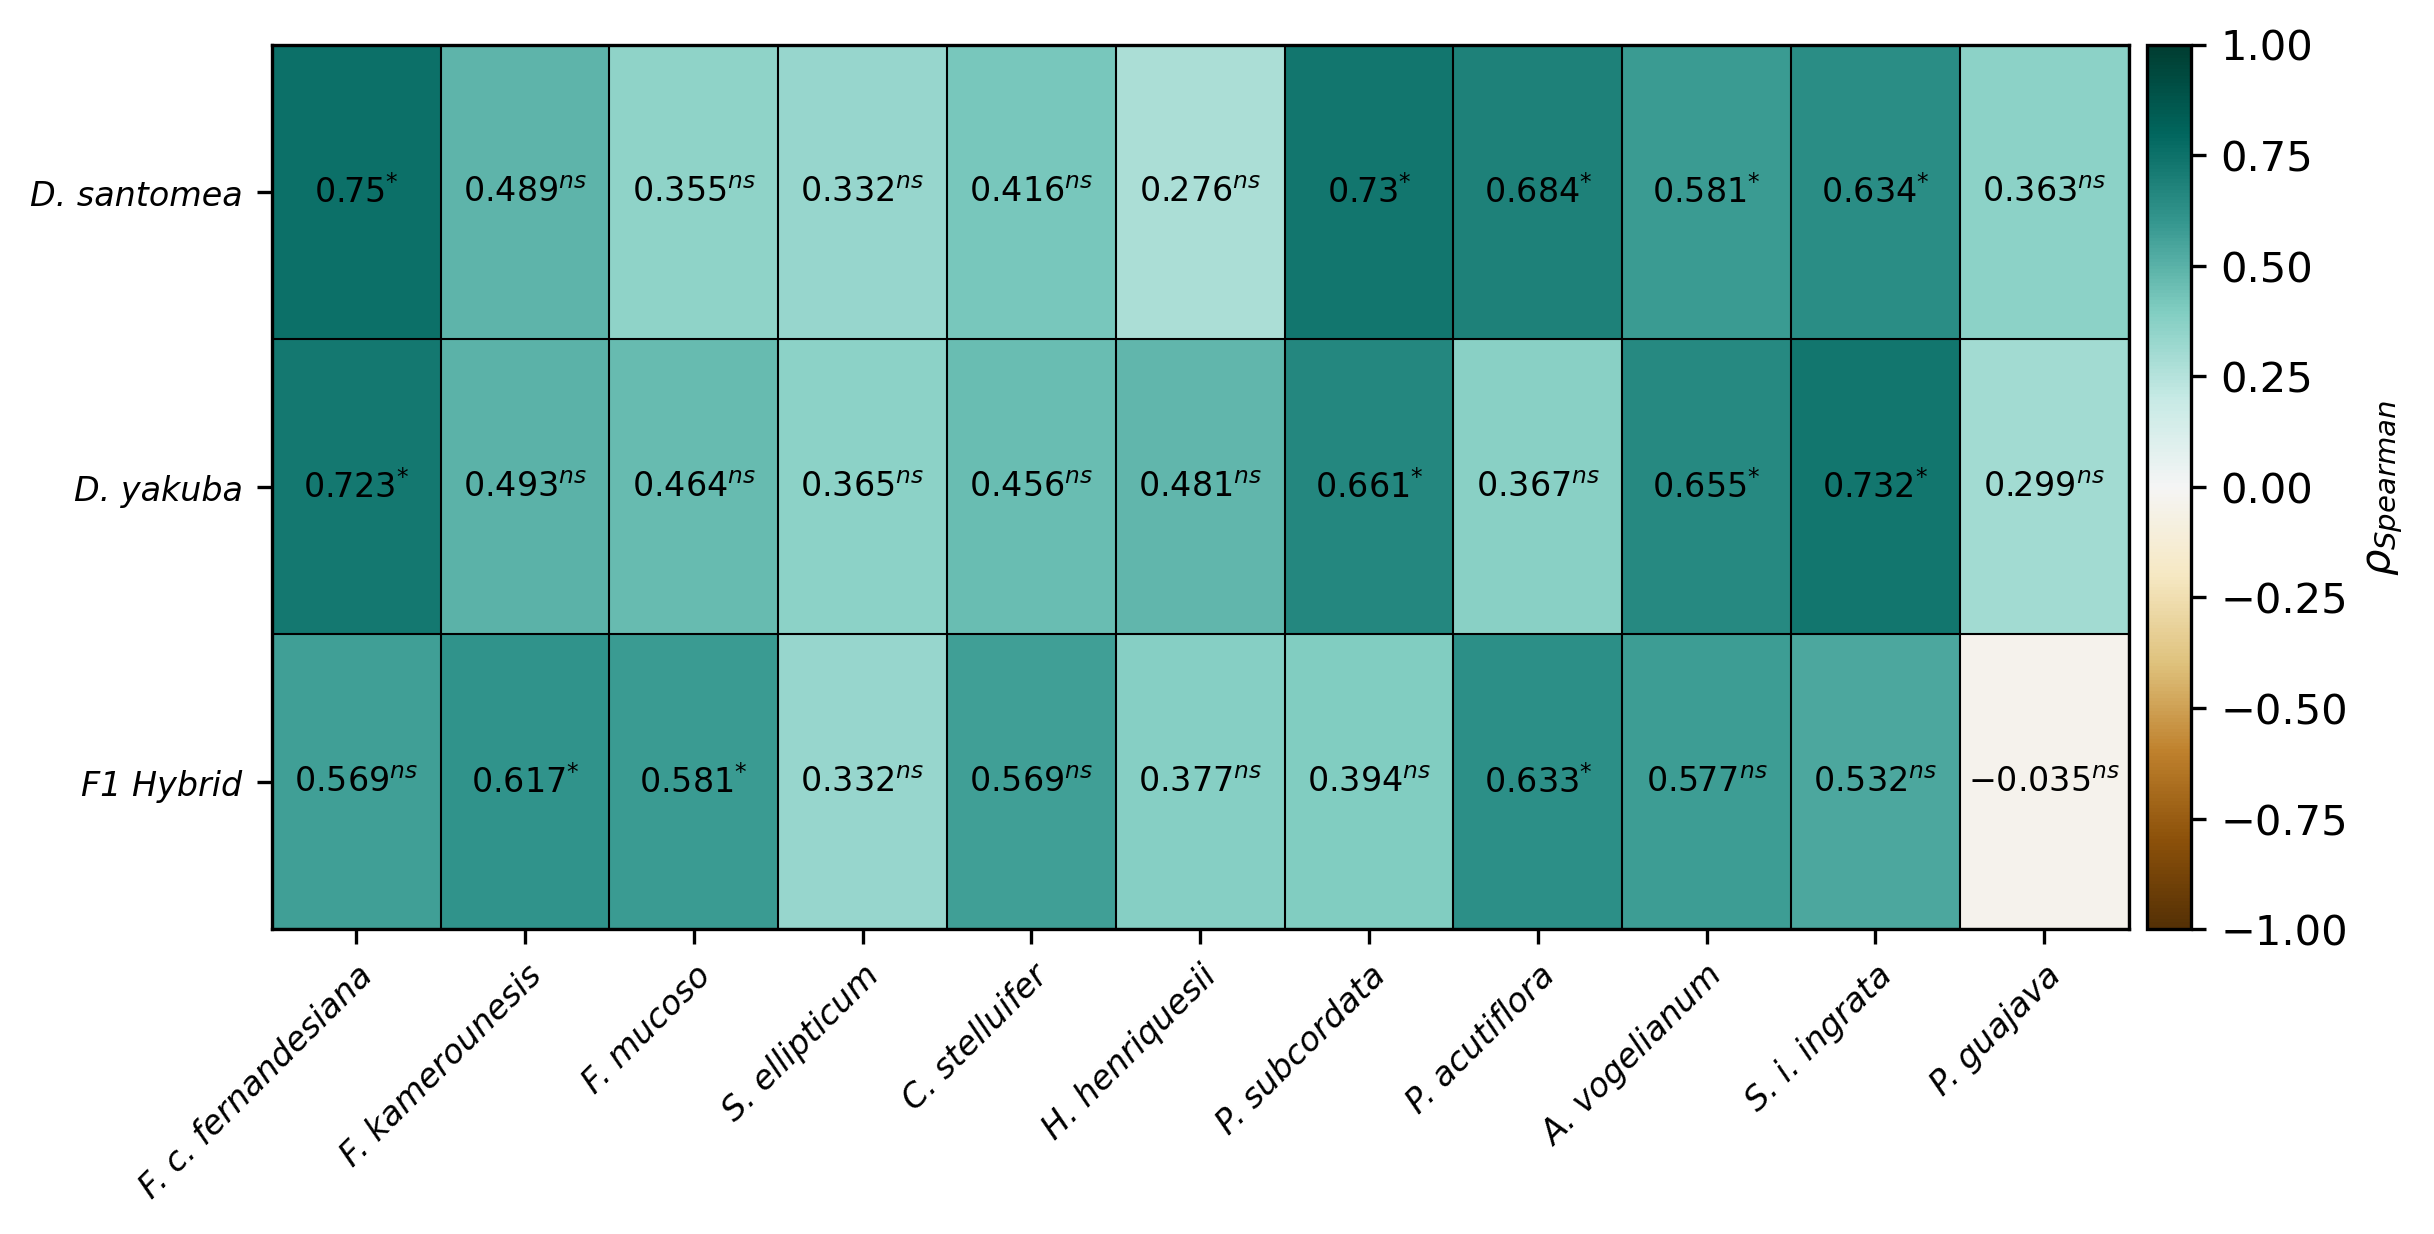

In [7]:
# Intialize a list of fruit labels.
fruit_labels = [
    "F. c. fernandesiana",
    "F. kamerounesis",
    "F. mucoso",
    "S. ellipticum",
    "C. stelluifer",
    "H. henriquesii",
    "P. subcordata",
    "P. acutiflora",
    "A. vogelianum",
    "S. i. ingrata",
    "P. guajava",
]
# Intialize the figure and axes.
fig = plt.figure(
    figsize=(8, 4),
    facecolor="white",
    constrained_layout=True,
    dpi=300,
)
ax = fig.add_subplot(111)
# Plot the heatmap.
im = ax.imshow(
    corr_mat,
    vmin=-1,
    vmax=1,
    aspect="auto",
    cmap="BrBG",
)
# Intialize the positions for the colobar.
cbar = fig.colorbar(
    im,
    ax=ax,
    pad=0.01,
    label=r"$\rho_{Spearman}$",
)
# Seperate each box.
ax.set_xticks(np.arange(0, corr_mat.shape[1], 1))
ax.set_yticks(np.arange(0, corr_mat.shape[0], 1))
ax.set_xticks(
    np.arange(-0.5, corr_mat.shape[1], 1),
    minor=True,
)
ax.set_yticks(
    np.arange(-0.5, corr_mat.shape[0], 1),
    minor=True,
)
ax.grid(
    which="minor",
    color="black",
    linestyle="-",
    linewidth=0.5,
)
# For every row in the subplot.
for y in range(len(dros_list)):
    # For every column in the subplot.
    for x in range(len(fruit_list)):
        # If the p-value is significant.
        if pval_mat[y, x] < (0.05 / pval_mat.size):
            # Annotate the significant correlation coefficient.
            ax.text(
                x,
                y,
                r"$" + str(round(corr_mat[y, x], 3)) + "^{*}$",
                ha="center",
                va="center",
                color="black",
                fontsize=8,
            )
        # Else the correlation coefficient is not significant.
        else:
            # Annotate the insignificant correlation coefficient.
            ax.text(
                x,
                y,
                r"$" + str(round(corr_mat[y, x], 3)) + "^{ns}$",
                ha="center",
                va="center",
                color="black",
                fontsize=8,
            )
# Set the x and y ticks for each plot.
ax.set_yticks(
    np.arange(corr_mat.shape[0]),
    labels=dros_list,
    fontsize=8,
    fontstyle="italic",
)
ax.set_xticks(
    np.arange(corr_mat.shape[1]),
    labels=fruit_labels,
    fontsize=8,
    fontstyle="italic",
    rotation=45,
    ha="right",
    rotation_mode="anchor",
)
# Remove the minor ticks.
ax.tick_params(
    which="minor",
    left=False,
    bottom=False,
    labelbottom=False,
)
# Respine the axes.
ax.spines["top"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(True)
# Show the plot.
plt.show()

In [8]:
# Initialize the fruiting months for the endemic fig.
fig_fruiting_periods = np.array(
    [
        "FEB-2018",
        "MAR-2018",
        "APR-2018",
        "MAY-2018",
        "JUN-2018",
        "OCT-2018",
        "NOV-2018",
        "DEC-2018",
        "FEB-2019",
        "MAR-2019",
        "APR-2019",
        "MAY-2019",
        "JUN-2019",
        "OCT-2019",
        "NOV-2019",
        "DEC-2019",
        "FEB-2020",
        "MAR-2020",
    ]
)
# Perform an anova for san abundance during the endemic fig's fruiting season.
fruiting_period_f, fruiting_period_p = stats.f_oneway(
    abundance_dicc["D. santomea"][np.isin(date_array, fig_fruiting_periods)],
    abundance_dicc["D. santomea"][~np.isin(date_array, fig_fruiting_periods)],
)
stats.ttest_ind(
    abundance_dicc["D. santomea"][np.isin(date_array, fig_fruiting_periods)],
    abundance_dicc["D. santomea"][~np.isin(date_array, fig_fruiting_periods)],
    equal_var=False,
    alternative="greater",
)

TtestResult(statistic=1.1669680868240364, pvalue=0.12736739338055048, df=23.900867336148284)

In [9]:
phenology_long_df

,species,month,year,count,type,date
0,Ficus clamydocarpa fernandesiana,JAN,2018,5,Fruit,JAN-2018
1,Ficus kamerounesis,JAN,2018,0,Fruit,JAN-2018
2,Ficus mucoso,JAN,2018,1,Fruit,JAN-2018
3,Sapium ellipticum,JAN,2018,3,Fruit,JAN-2018
4,Croton stelluifer,JAN,2018,13,Fruit,JAN-2018
...,...,...,...,...,...,...
481,D. yakuba_Obo,MAR,2020,31,Drosophila,MAR-2020
482,D. santomea_BS,MAR,2020,7,Drosophila,MAR-2020
483,F1_BS,MAR,2020,0,Drosophila,MAR-2020
484,D. yakuba_BS,MAR,2020,22,Drosophila,MAR-2020


In [10]:
# Initialize a list of months.
month_list = [
    "JAN",
    "FEB",
    "MAR",
    "APR",
    "MAY",
    "JUN",
    "JUL",
    "AUG",
    "SEP",
    "OCT",
    "NOV",
    "DEC",
]
# Initialize dictionaries for plotting.
mu_dicc = {
    "D. santomea": [],
    "D. yakuba": [],
    "F1 Hybrid": [],
}
se_dicc = {
    "D. santomea": [],
    "D. santomea": [],
    "D. yakuba": [],
    "F1 Hybrid": [],
}
# For every month.
for month in month_list:
    # Compute the mean abundance for each species.
    mu_dicc["D. santomea"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(san_list))
        ]["count"].mean()
    )
    mu_dicc["D. yakuba"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(yak_list))
        ]["count"].mean()
    )
    mu_dicc["F1 Hybrid"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(hybrid_list))
        ]["count"].mean()
    )
    # Compute the standard error for each species.
    se_dicc["D. santomea"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(san_list))
        ]["count"].sem()
    )
    se_dicc["D. yakuba"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(yak_list))
        ]["count"].sem()
    )
    se_dicc["F1 Hybrid"].append(
        phenology_long_df[
            (phenology_long_df.month == month)
            & (phenology_long_df.species.isin(hybrid_list))
        ]["count"].sem()
    )
# For every fruit species.
for fruit in fruit_list:
    # Intialize subdictionaries.
    mu_dicc[fruit] = []
    se_dicc[fruit] = []
    # For every month.
    for month in month_list:
        # Compute the mean abundance for each species.
        mu_dicc[fruit].append(
            phenology_long_df[
                (phenology_long_df.month == month)
                & (phenology_long_df.species == fruit)
            ]["count"].mean()
        )
        # Compute the standard error for each species.
        se_dicc[fruit].append(
            phenology_long_df[
                (phenology_long_df.month == month)
                & (phenology_long_df.species == fruit)
            ]["count"].sem()
        )

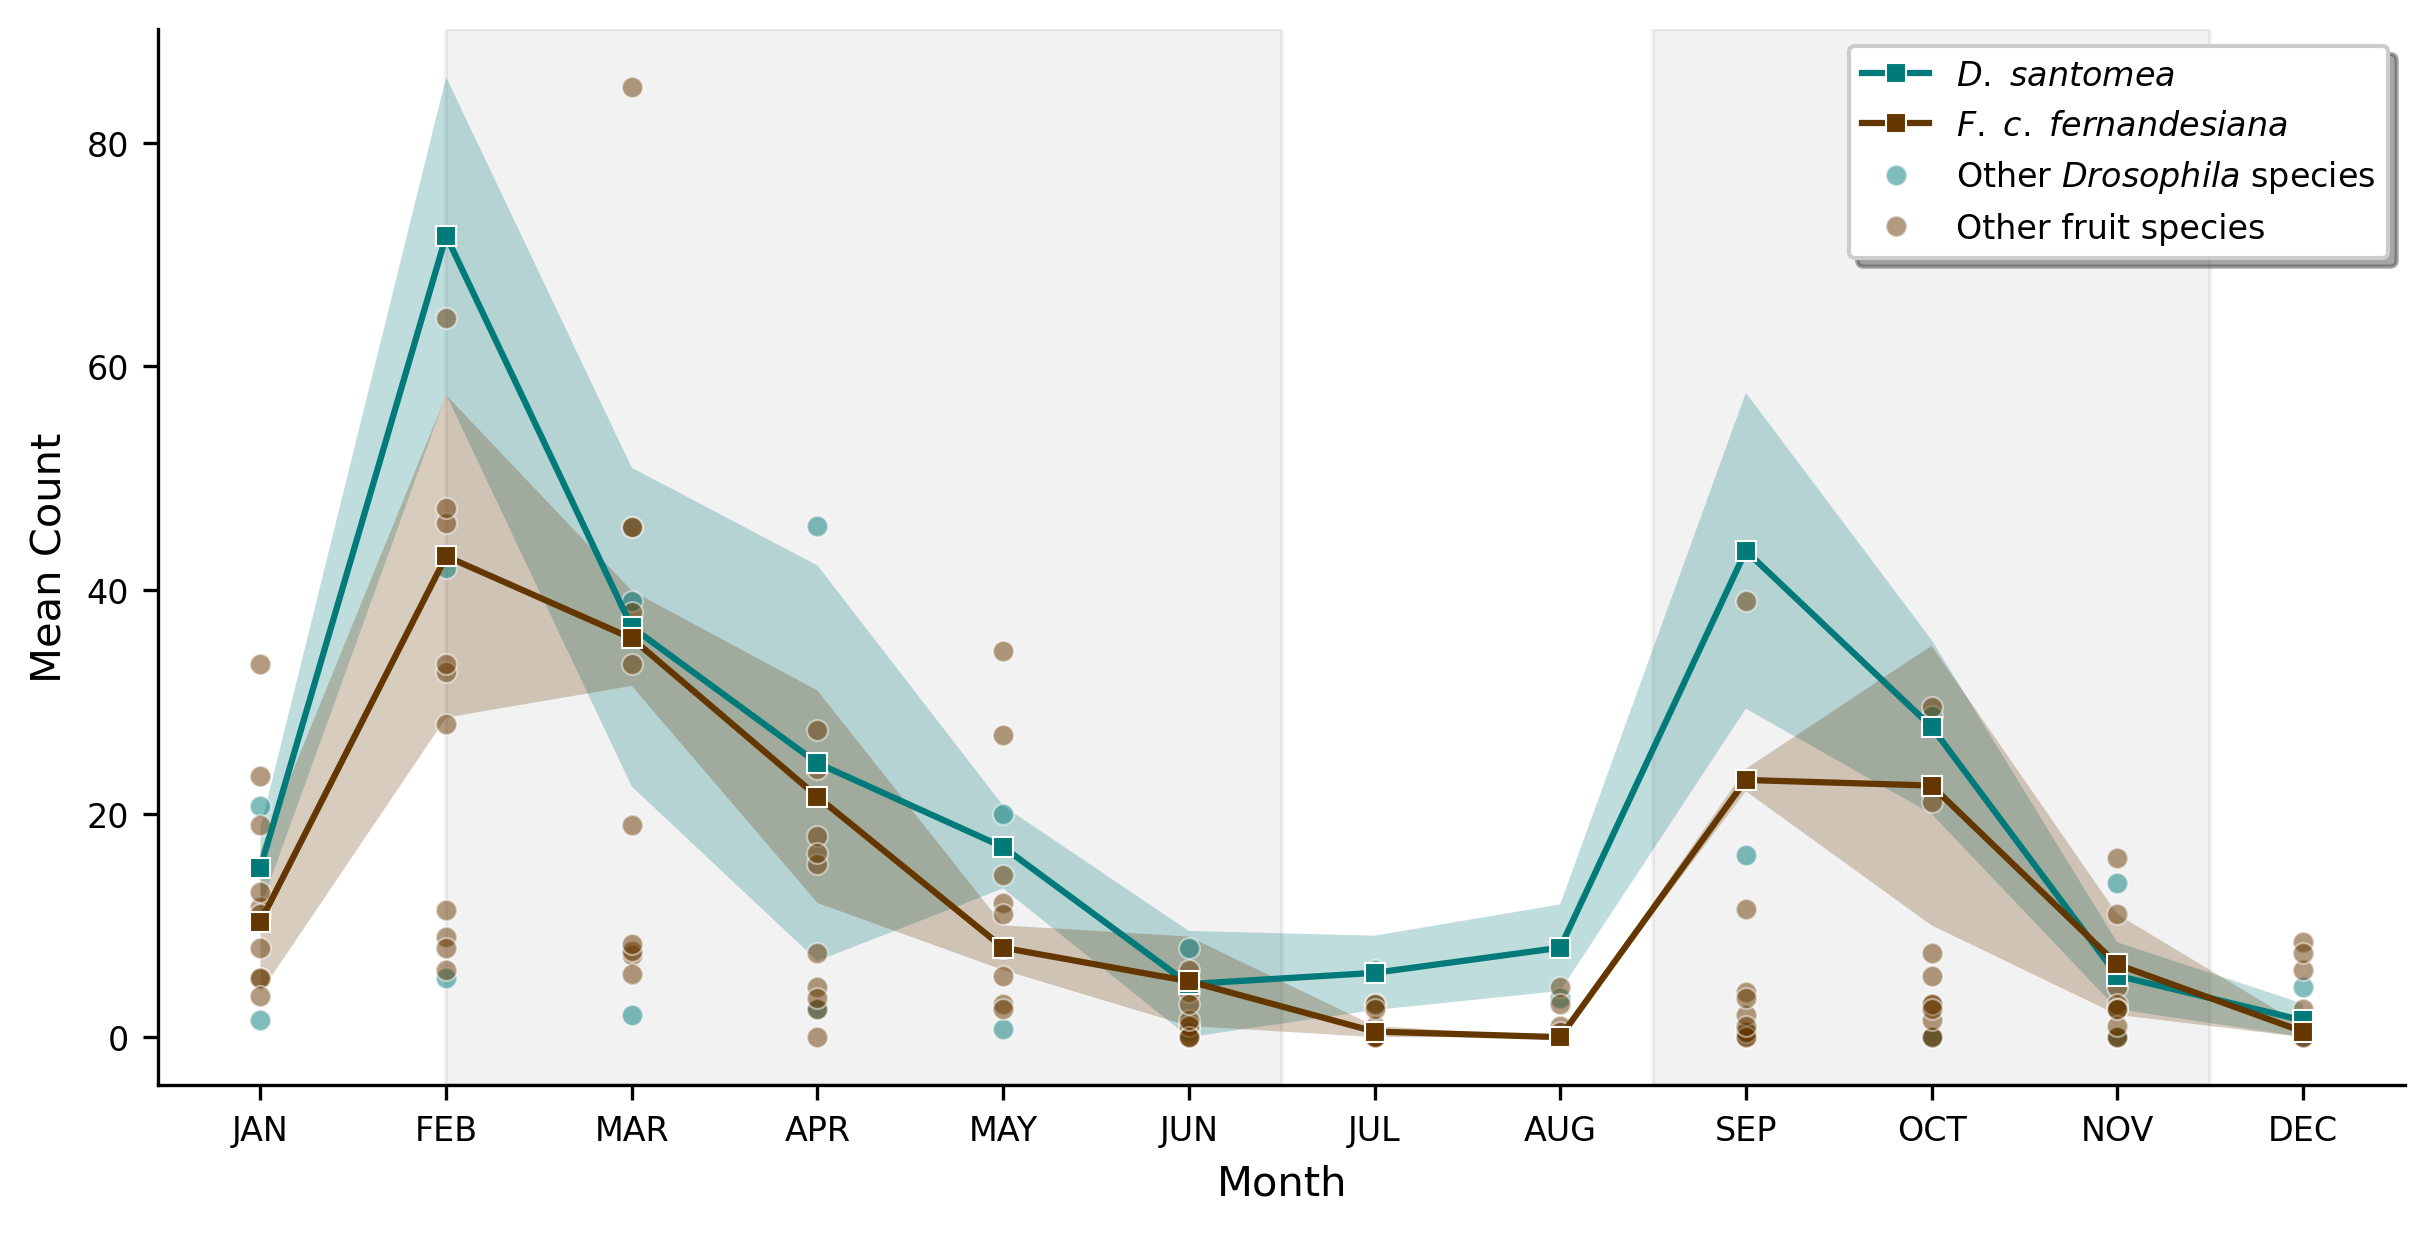

In [11]:
# Intialize the figure and axes.
fig = plt.figure(
    figsize=(8, 4),
    facecolor="white",
    constrained_layout=True,
    dpi=300,
)
ax = fig.add_subplot(111)
# Annotate the fruiting periods.
ax.axvspan(1, 5.5, color="black", alpha=0.05, edgecolor=None)
ax.axvspan(7.5, 10.5, color="black", alpha=0.05, edgecolor=None)
# Plot san.
ax.plot(
    np.arange(len(month_list)),
    mu_dicc["D. santomea"],
    color="#017a79",
    marker="s",
    markersize=5,
    markeredgewidth=0.5,
    markeredgecolor="white",
)
ax.fill_between(
    np.arange(len(month_list)),
    np.array(mu_dicc["D. santomea"]) - np.array(se_dicc["D. santomea"]),
    np.array(mu_dicc["D. santomea"]) + np.array(se_dicc["D. santomea"]),
    color="#017a79",
    alpha=0.25,
    edgecolor="none",
)
# Plot the endemic fig.
ax.plot(
    np.arange(len(month_list)),
    mu_dicc["Ficus clamydocarpa fernandesiana"],
    color="#653700",
    marker="s",
    markersize=5,
    markeredgewidth=0.5,
    markeredgecolor="white",
)
ax.fill_between(
    np.arange(len(month_list)),
    np.array(mu_dicc["Ficus clamydocarpa fernandesiana"])
    - np.array(se_dicc["Ficus clamydocarpa fernandesiana"]),
    np.array(mu_dicc["Ficus clamydocarpa fernandesiana"])
    + np.array(se_dicc["Ficus clamydocarpa fernandesiana"]),
    color="#653700",
    alpha=0.25,
    edgecolor="none",
)
# For the other dros species.
for dros in dros_list[1:]:
    # Plot the dros species.
    ax.scatter(
        np.arange(len(month_list)),
        mu_dicc[dros],
        facecolor="#017a79",
        marker="o",
        s=25,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.5,
    )
# For the other fruit species.
for fruit in fruit_list[1:]:
    # Plot the fruit species.
    ax.scatter(
        np.arange(len(month_list)),
        mu_dicc[fruit],
        facecolor="#653700",
        marker="o",
        s=25,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.5,
    )
# Set the x-axis ticks.
ax.set_xticks(np.arange(len(month_list)), labels=month_list, fontsize=8)
# Set the y-tick label size.
ax.tick_params(axis="y", labelsize=8)
# Label the axes.
ax.set_xlabel("Month", fontsize=10)
ax.set_ylabel("Mean Count", fontsize=10)
# Construct the legend elements.
legend_elements = [
    Line2D(
        [0],
        [0],
        color="#017a79",
        marker="s",
        markersize=5,
        markeredgewidth=0.5,
        markeredgecolor="white",
        label=r"$D.$ $santomea$",
    ),
    Line2D(
        [0],
        [0],
        color="#653700",
        marker="s",
        markersize=5,
        markeredgewidth=0.5,
        markeredgecolor="white",
        label=r"$F.$ $c.$ $fernandesiana$",
    ),
    Line2D(
        [0],
        [0],
        color="#017a79",
        marker="o",
        markersize=5,
        markeredgewidth=0.5,
        markeredgecolor="white",
        linestyle="none",
        alpha=0.5,
        label=r"Other $Drosophila$ species",
    ),
    Line2D(
        [0],
        [0],
        color="#653700",
        marker="o",
        markersize=5,
        markeredgewidth=0.5,
        markeredgecolor="white",
        linestyle="none",
        alpha=0.5,
        label="Other fruit species",
    ),
]
# Add the legend to the plot.
ax.legend(
    handles=legend_elements,
    fontsize=8,
    frameon=True,
    fancybox=True,
    shadow=True,
)
# Show the plot.
plt.show()

## Eclosion

In [12]:
# Load the eclosion data into a Pandas dataframe.
eclosion_df = pd.read_csv("../data/eclosion_data.csv")

In [13]:
san_eclosion_df = eclosion_df[eclosion_df.species == "D. santomea"]
yak_eclosion_df = eclosion_df[eclosion_df.species == "D. yakuba"]

In [14]:
# Build the contingency table.
f_c_fer_counts = np.array(
    [
        san_eclosion_df[san_eclosion_df.substrate == "F. c. fernandesiana"][
            "count"
        ].sum(),
        yak_eclosion_df[yak_eclosion_df.substrate == "F. c. fernandesiana"][
            "count"
        ].sum(),
    ]
)
tot_counts = np.array(
    [
        san_eclosion_df["count"].sum(),
        yak_eclosion_df["count"].sum(),
    ]
)

In [15]:
f_c_fer_counts / tot_counts

array([0.89781022, 0.04210526])

In [16]:
proportions_ztest(f_c_fer_counts, tot_counts, alternative="larger", prop_var=False)

(17.646360760839034, 5.426413238317213e-70)

In [17]:
stats.chi2_contingency(
    np.array(
        [
            f_c_fer_counts,
            tot_counts - f_c_fer_counts,
        ]
    )
)

Chi2ContingencyResult(statistic=307.4733828154678, pvalue=7.756010642659038e-69, dof=1, expected_freq=array([[ 43.82701422,  91.17298578],
       [ 93.17298578, 193.82701422]]))

In [26]:
# Intialize total counts.
san_tots = []
yak_tots = []
# For every replicate cage.
for i in range(1, 6):
    san_tots.append(
        eclosion_df[
            (eclosion_df.species == "D. santomea")
            & (eclosion_df.replicate == f"cage{i}")
        ]["count"].sum()
    )
    yak_tots.append(
        eclosion_df[
            (eclosion_df.species == "D. yakuba") & (eclosion_df.replicate == f"cage{i}")
        ]["count"].sum()
    )

In [27]:
# Intialize a list of substrates.
eclosion_substrates = [
    "F. c. fernandesiana",
    "F. kamerounesis",
    "F. mucoso",
    "P. guajava",
]
# Intialize a list for plotting.
san_counts = []
yak_counts = []
# For every substrate.
for substrate in eclosion_substrates:
    # Append the proportions.
    san_counts.append(
        eclosion_df[
            (eclosion_df.species == "D. santomea")
            & (eclosion_df.substrate == substrate)
        ]["count"].values
        / np.array(san_tots)
    )
    yak_counts.append(
        eclosion_df[
            (eclosion_df.species == "D. yakuba") & (eclosion_df.substrate == substrate)
        ]["count"].values
        / np.array(yak_tots)
    )
# Set the center positions.
org_pos = np.arange(0, len(eclosion_substrates) * 3, 3)
label_pos = org_pos + 0.5
san_pos = org_pos
yak_pos = org_pos + 1

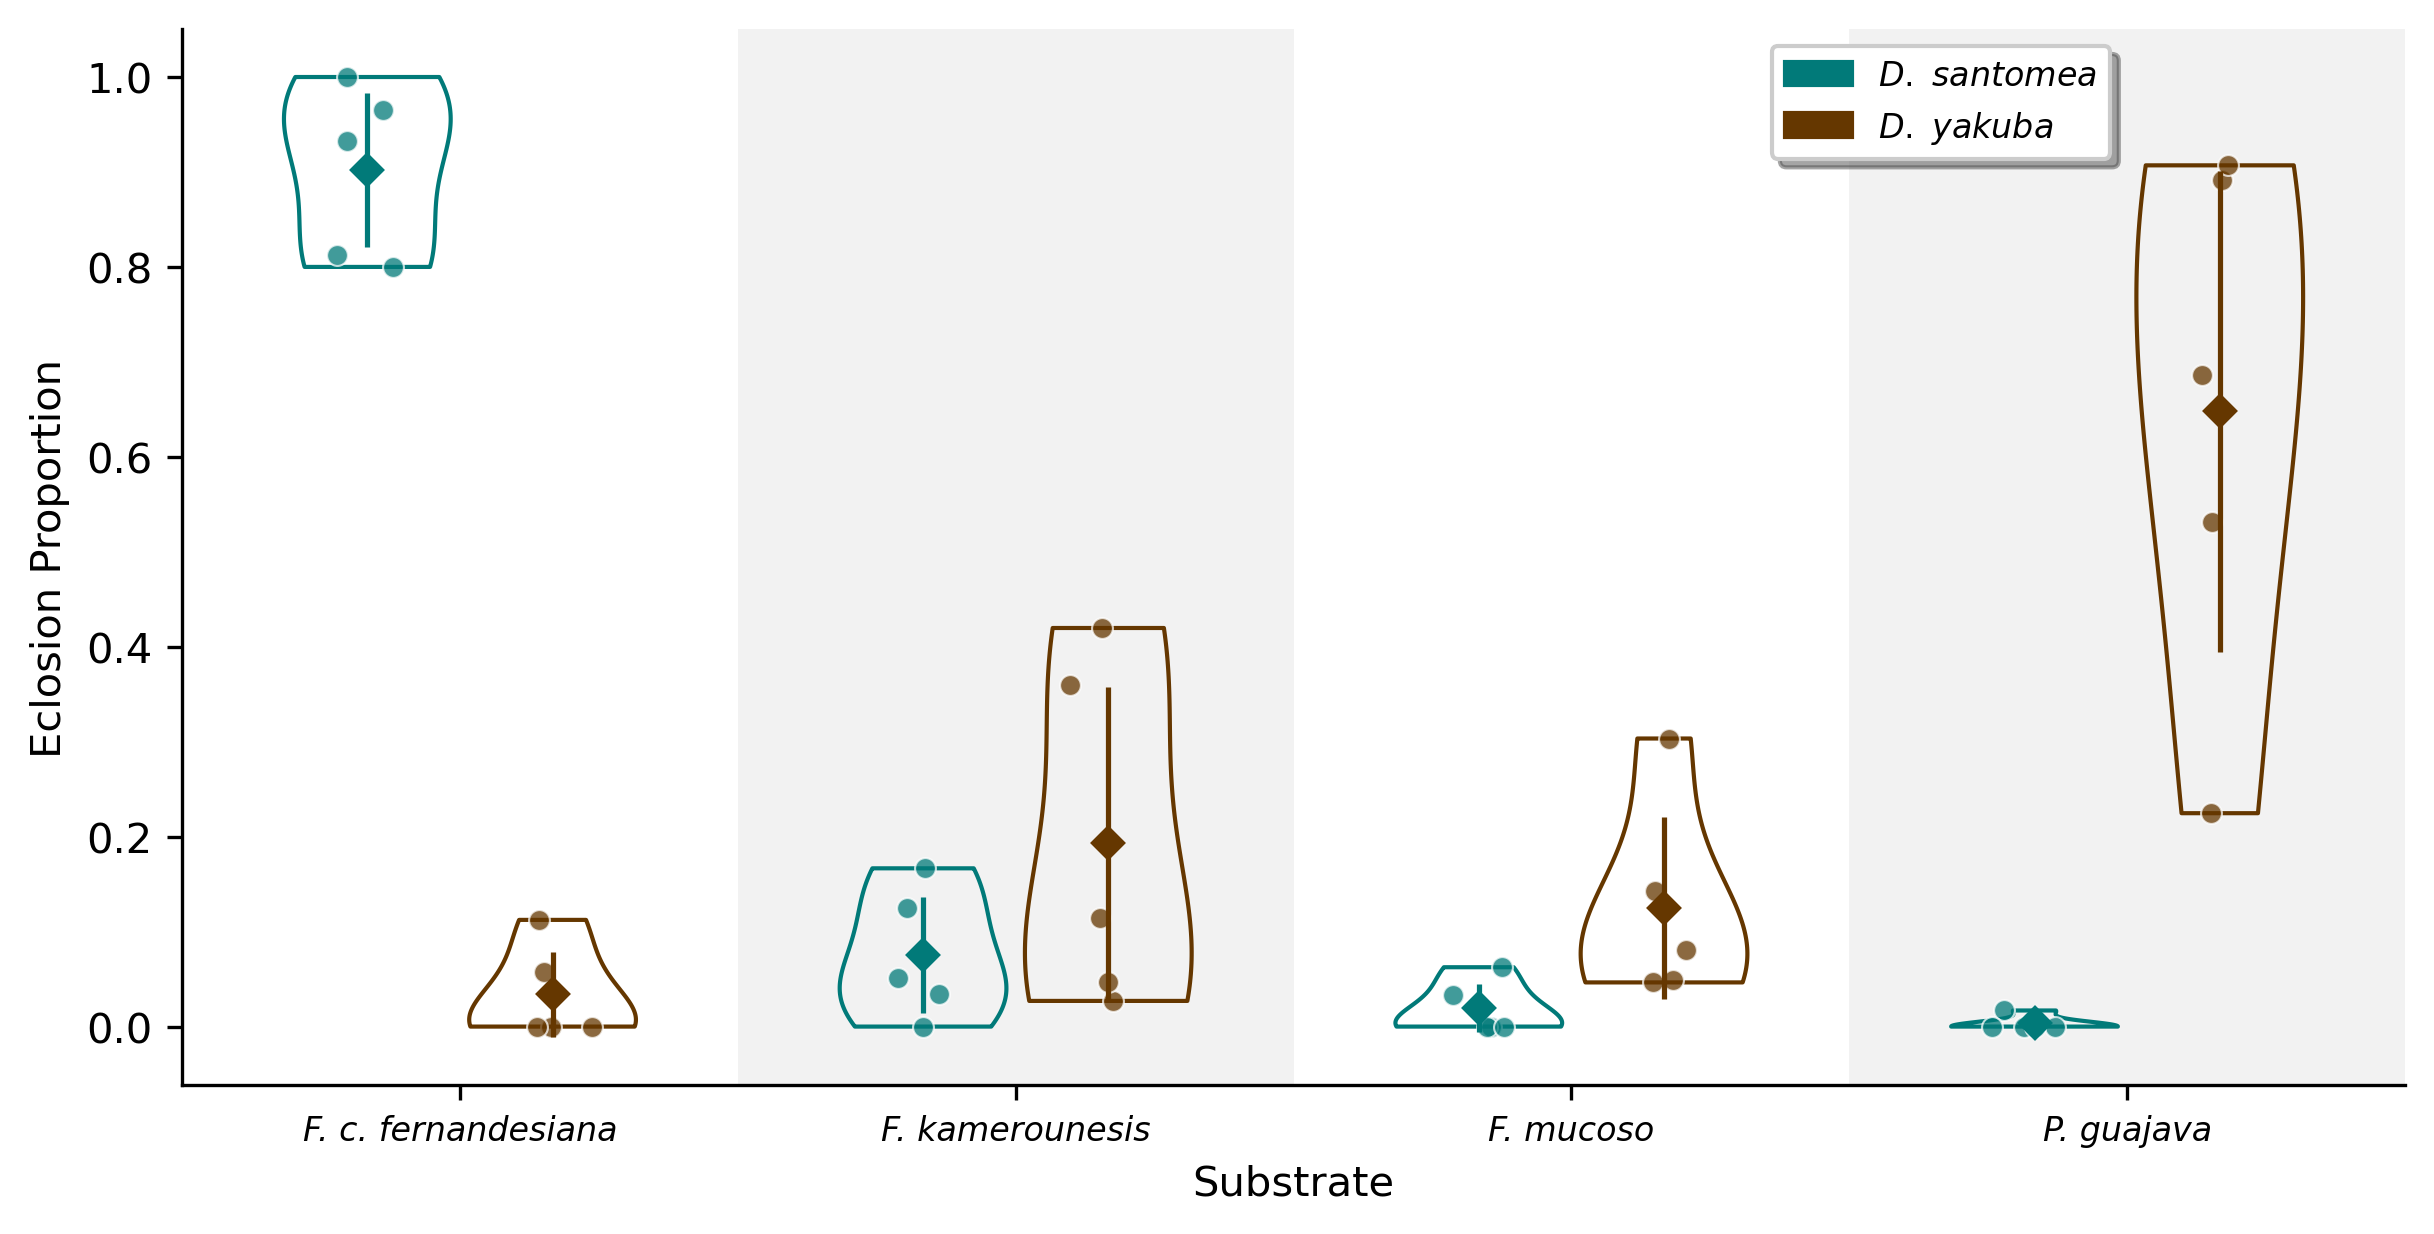

In [31]:
# Intialize the figure and axes.
fig = plt.figure(
    figsize=(8, 4),
    facecolor="white",
    constrained_layout=True,
    dpi=300,
)
ax = fig.add_subplot(111)
# For every other substrate.
for loc in np.arange(3, len(eclosion_substrates) * 3, 6) + 0.5:
    ax.axvspan(loc - 1.5, loc + 1.5, facecolor="black", alpha=0.05)
# Plot the san distributions.
san_vp = ax.violinplot(
    san_counts,
    san_pos,
    vert=True,
    showextrema=False,
    showmeans=False,
    widths=0.9,
)
# Adjust the violin plots to only show the outline.
for pc in san_vp["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor("#017a79")
    pc.set_alpha(1)
# Plot the yak distributions.
yak_vp = ax.violinplot(
    yak_counts,
    yak_pos,
    vert=True,
    showextrema=False,
    showmeans=False,
    widths=0.9,
)
# Adjust the violin plots to only show the outline.
for pc in yak_vp["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor("#653700")
    pc.set_alpha(1)
# For every substrate.
for i in range(len(eclosion_substrates)):
    # Plot the san means and standard errors.
    ax.errorbar(
        san_pos[i],
        np.mean(san_counts[i]),
        yerr=np.std(san_counts[i]),
        color="#017a79",
        marker="D",
        markersize=5,
        linewidth=1.25,
    )
    # Plot the yak means and standard errors.
    ax.errorbar(
        yak_pos[i],
        np.mean(yak_counts[i]),
        yerr=np.std(yak_counts[i]),
        color="#653700",
        marker="D",
        markersize=5,
        linewidth=1.25,
    )
    # Add some jitter to the eclosion data.
    san_jitter = np.random.normal(san_pos[i], 0.1, size=len(san_counts[i]))
    yak_jitter = np.random.normal(yak_pos[i], 0.1, size=len(yak_counts[i]))
    # Plot the san eclosion data.
    ax.scatter(
        san_jitter,
        san_counts[i],
        color="#017a79",
        marker="o",
        s=25,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.75,
    )
    # Plot the yak eclosion data.
    ax.scatter(
        yak_jitter,
        yak_counts[i],
        color="#653700",
        marker="o",
        s=25,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.75,
    )
# Construct the legend elements.
legend_elements = [
    Patch(color="#017a79", label=r"$D.$ $santomea$"),
    Patch(color="#653700", label=r"$D.$ $yakuba$"),
]
# Add the legend to the plot.
ax.legend(
    handles=legend_elements,
    fontsize=8,
    loc="upper right",
    bbox_to_anchor=(0.875, 1.0),
    frameon=True,
    fancybox=True,
    shadow=True,
)
# Set the x-axis limits.
ax.set_xlim(label_pos[0] - 1.5, label_pos[-1] + 1.5)
# Set the x-axis ticks.
ax.set_xticks(label_pos)
ax.set_xticklabels(eclosion_substrates, fontstyle="italic", fontsize=8)
# Set the x-axis label.
ax.set_xlabel("Substrate", fontsize=10)
# Set the y-axis label.
ax.set_ylabel("Eclosion Proportion", fontsize=10)
# Show the plot.
plt.show()

## Viability

In [32]:
# Load the viability data into a Pandas dataframe.
viability_df = pd.read_csv("../data/viability_data.csv")

In [33]:
# Initialize a dictionary for the GLM.
glm_dicc = {
    "prop": viability_df.adults.values / viability_df.larvae.values,
    "species": viability_df.species.values,
    "substrate": viability_df.substrate.values,
}
# Initialize the dataframe for the GLM.
glm_df = pd.DataFrame(glm_dicc)
# Initialize the categorical column types.
glm_df["species"] = glm_df["species"].astype("category")
glm_df["substrate"] = glm_df["substrate"].astype("category")
glm_df["species"] = glm_df["species"].cat.reorder_categories(
    ["D. yakuba", "D. santomea"], ordered=True
)

In [34]:
glm_df

,prop,species,substrate
0,0.200000,D. santomea,F. kamerounesis
1,0.083333,D. santomea,F. mucoso
2,0.511628,D. santomea,Cornmeal
3,0.510204,D. santomea,F. c. fernandesiana
4,0.088889,D. santomea,F. kamerounesis
...,...,...,...
135,0.220000,D. yakuba,F. mucoso
136,0.367347,D. yakuba,Cornmeal
137,0.520000,D. yakuba,F. c. fernandesiana
138,0.208333,D. yakuba,F. kamerounesis


In [35]:
# Define the variance function for a quasi-binomial model.
class vf(sm.families.varfuncs.VarianceFunction):
    def __call__(self, mu):
        return mu**2 * (1 - mu) ** 2

    def deriv(self, mu):
        return 2 * mu - 6 * mu**2 + 4 * mu**3

In [36]:
bin = sm.families.Binomial()
bin.variance = vf()
glm_model = sm.GLM.from_formula("prop ~ species * substrate", family=bin, data=glm_df)
glm_result = glm_model.fit(scale="X2")
print(glm_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   prop   No. Observations:                  140
Model:                            GLM   Df Residuals:                      132
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                         0.37371
Method:                          IRLS   Log-Likelihood:                -62.102
Date:                Tue, 05 Dec 2023   Deviance:                       11.268
Time:                        13:25:52   Pearson chi2:                     49.3
No. Iterations:                     6   Pseudo R-squ. (CS):            0.07361
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [37]:
# Grab the chi square satistic from the model summary.
pearson_chi2_statistic = glm_result.pearson_chi2
# Calculate the p-value.
chi2_pval = stats.chi2.sf(pearson_chi2_statistic, 3)
print(f"statistic: {pearson_chi2_statistic}, p-value: {chi2_pval}")

statistic: 49.33029472820539, p-value: 1.1094558432951577e-10


In [38]:
glm_df.substrate.unique()

['F. kamerounesis', 'F. mucoso', 'Cornmeal', 'F. c. fernandesiana']
Categories (4, object): ['Cornmeal', 'F. c. fernandesiana', 'F. kamerounesis', 'F. mucoso']

In [39]:
# Intialize a list of substrates.
viability_substrates = [
    "Cornmeal",
    "F. c. fernandesiana",
    "F. kamerounesis",
    "F. mucoso",
]
# Intialize a list for plotting.
san_props = []
yak_props = []
# For every substrate.
for substrate in viability_substrates:
    # Append the proportions.
    san_props.append(
        glm_df[(glm_df.species == "D. santomea") & (glm_df.substrate == substrate)][
            "prop"
        ].values
    )
    yak_props.append(
        glm_df[(glm_df.species == "D. yakuba") & (glm_df.substrate == substrate)][
            "prop"
        ].values
    )
# Intialize a list of substrates labels
viability_substrate_labels = [
    "Cornmeal",
    r"$F. c. fernandesiana$",
    r"$F. kamerounesis$",
    r"$F. mucoso$",
]
# Set the center positions.
org_pos = np.arange(0, len(viability_substrates) * 3, 3)
label_pos = org_pos + 0.5
san_pos = org_pos
yak_pos = org_pos + 1

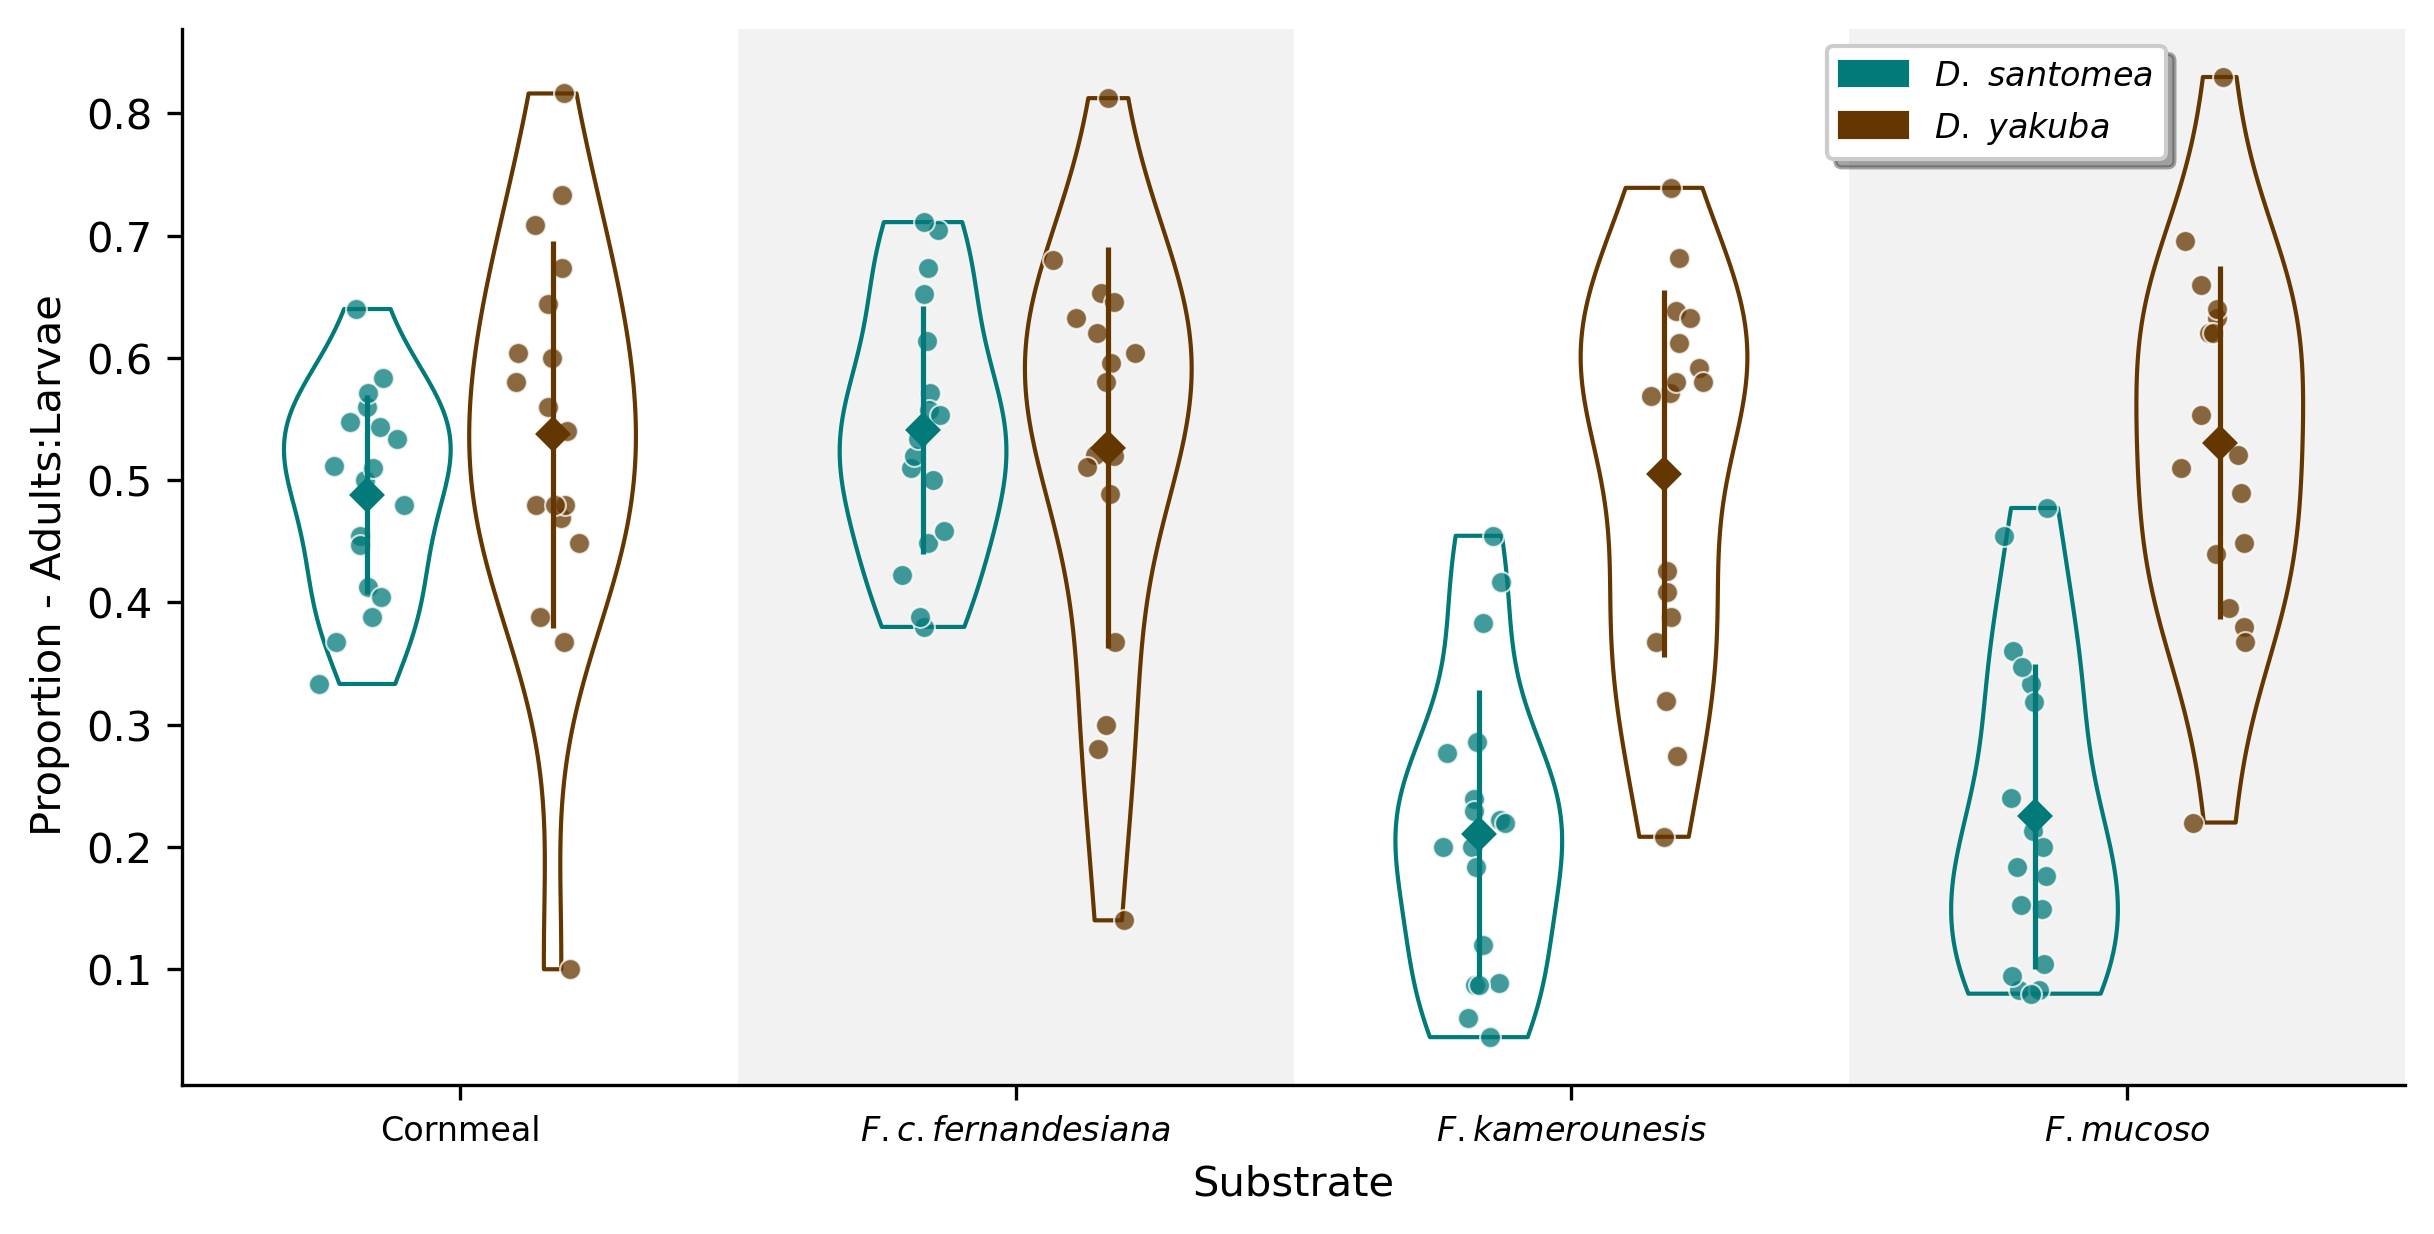

In [40]:
# Intialize the figure and axes.
fig = plt.figure(
    figsize=(8, 4),
    facecolor="white",
    constrained_layout=True,
    dpi=300,
)
ax = fig.add_subplot(111)
# For every other substrate.
for loc in np.arange(3, len(viability_substrates) * 3, 6) + 0.5:
    ax.axvspan(loc - 1.5, loc + 1.5, facecolor="black", alpha=0.05)
# Plot the san distributions.
san_vp = ax.violinplot(
    san_props,
    san_pos,
    vert=True,
    showextrema=False,
    showmeans=False,
    widths=0.9,
)
# Adjust the violin plots to only show the outline.
for pc in san_vp["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor("#017a79")
    pc.set_alpha(1)
# Plot the yak distributions.
yak_vp = ax.violinplot(
    yak_props,
    yak_pos,
    vert=True,
    showextrema=False,
    showmeans=False,
    widths=0.9,
)
# Adjust the violin plots to only show the outline.
for pc in yak_vp["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor("#653700")
    pc.set_alpha(1)
# For every substrate.
for i in range(len(viability_substrates)):
    # Plot the san means and standard errors.
    ax.errorbar(
        san_pos[i],
        np.mean(san_props[i]),
        yerr=np.std(san_props[i]),
        color="#017a79",
        marker="D",
        markersize=5,
        linewidth=1.25,
    )
    # Plot the yak means and standard errors.
    ax.errorbar(
        yak_pos[i],
        np.mean(yak_props[i]),
        yerr=np.std(yak_props[i]),
        color="#653700",
        marker="D",
        markersize=5,
        linewidth=1.25,
    )
    # Add some jitter to the viability data.
    san_jitter = np.random.normal(san_pos[i], 0.1, size=len(san_props[i]))
    yak_jitter = np.random.normal(yak_pos[i], 0.1, size=len(yak_props[i]))
    # Plot the san viability data.
    ax.scatter(
        san_jitter,
        san_props[i],
        color="#017a79",
        marker="o",
        s=25,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.75,
    )
    # Plot the yak viability data.
    ax.scatter(
        yak_jitter,
        yak_props[i],
        color="#653700",
        marker="o",
        s=25,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.75,
    )
# Construct the legend elements.
legend_elements = [
    Patch(color="#017a79", label=r"$D.$ $santomea$"),
    Patch(color="#653700", label=r"$D.$ $yakuba$"),
]
# Add the legend to the plot.
ax.legend(
    handles=legend_elements,
    fontsize=8,
    loc="upper right",
    bbox_to_anchor=(0.9, 1.0),
    frameon=True,
    fancybox=True,
    shadow=True,
)
# Set the x-axis limits.
ax.set_xlim(label_pos[0] - 1.5, label_pos[-1] + 1.5)
# Set the x-axis ticks.
ax.set_xticks(label_pos)
ax.set_xticklabels(viability_substrate_labels, fontsize=8)
# Set the x-axis label.
ax.set_xlabel("Substrate", fontsize=10)
# Set the y-axis label.
ax.set_ylabel("Proportion - Adults:Larvae ", fontsize=10)
# Show the plot.
plt.show()